# Coherence experiments

In [1]:
%load_ext autoreload
%autoreload 2

from iqm.benchmarks.coherence.coherence import *
from iqm.qiskit_iqm import IQMProvider
import numpy as np
import os

## Choose (or define) a backend

In [7]:
# Input your Resonance token
token = "XXXXX-XXXXXXX-XXXXXXXX"  # Replace with your actual token
os.environ["IQM_TOKEN"] = token

QPU = "sirius"  # Options for QPUs are: garnet, sirius, emerald

iqm_server_url = 'https://cocos.resonance.meetiqm.com/' + QPU

provider = IQMProvider(iqm_server_url)
backend = provider.get_backend()

/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/iqm_client/iqm_client.py:142: UserWarning: Your IQM Client version 27.1.0 was built for a different version of IQM Server. You might encounter issues. For the best experience, consider using a version of IQM Client that satisfies 29.2.0 <= iqm-client < 30.0.
  warnings.warn(version_incompatibility_msg)


## Coherence Configuration

In [11]:
EXAMPLE = CoherenceConfiguration(
    delays = list(np.linspace(0, 100e-6, 100)), # Delays specified in seconds
    qiskit_optim_level = 3,
    optimize_sqg = True,
    coherence_exp = "t2_echo", # Options: "t1", "t2_echo"
    qubits_to_plot=list(range(backend.num_qubits)), # Give the list of qubits you want to plot
    shots = 1000,
    )

## Run the experiment

In [12]:
benchmark = CoherenceBenchmark(backend, EXAMPLE)
run = benchmark.run()

/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/qiskit_iqm/iqm_provider.py:171: UserWarning: Unknown backend option(s): {'calibration_set_id': None}
  warnings.warn(f"Unknown backend option(s): {unknown_options}")
2025-07-12 19:30:15,202 - iqm.benchmarks.logging_config - INFO - Retrieving all counts


## Perform analysis and plot results

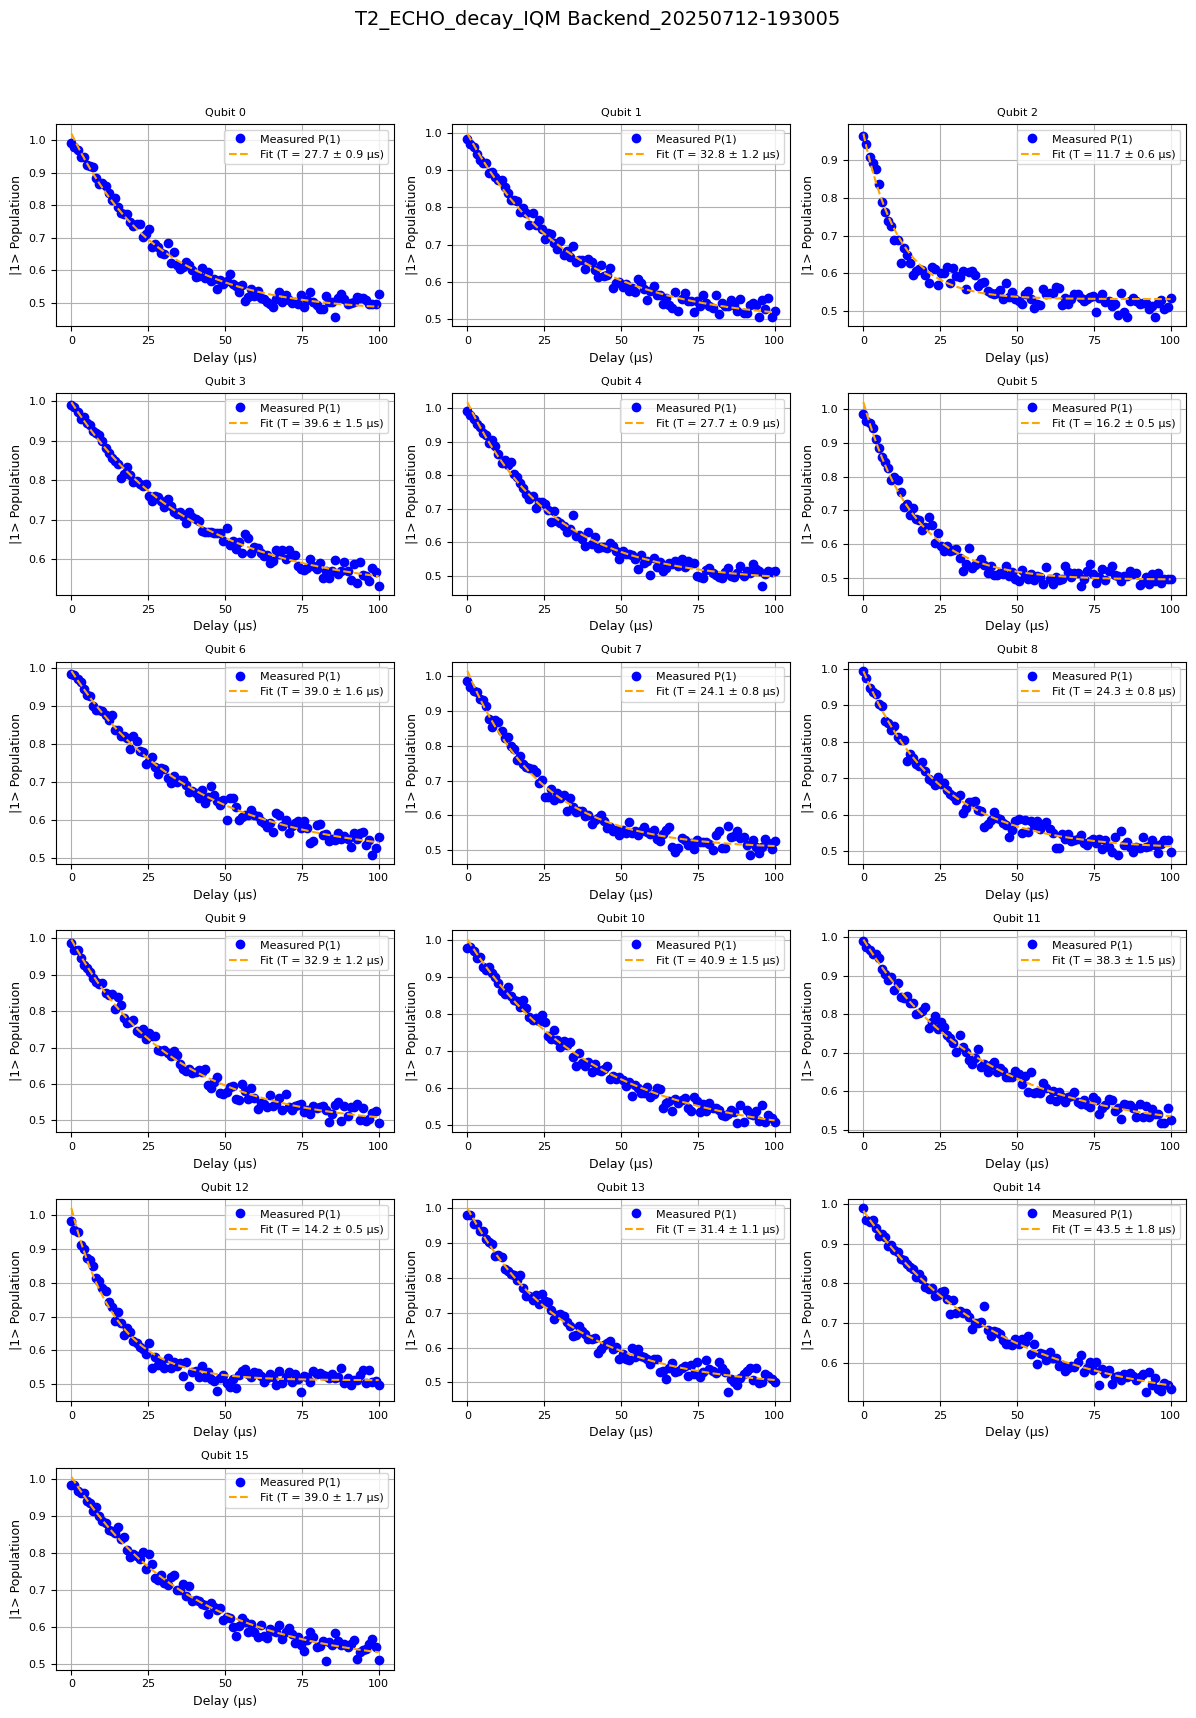

In [13]:
result = benchmark.analyze()
result.plot_all()

In [14]:
result.observations

[BenchmarkObservation(name='T2_echo', value=2.7679157313590913e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=0), uncertainty=9.332763060487301e-07),
 BenchmarkObservation(name='T2_echo', value=3.2792580706714276e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=1), uncertainty=1.1769872662543327e-06),
 BenchmarkObservation(name='T2_echo', value=1.1690066792698488e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=5.835859627497227e-07),
 BenchmarkObservation(name='T2_echo', value=3.9581411901572643e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=1.5349341834275828e-06),
 BenchmarkObservation(name='T2_echo', value=2.7667960136510046e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=4), uncertainty=8.650295798103166e-07),
 BenchmarkObservation(name='T2_echo', value=1.6166287001435286e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=5), uncertainty=5.030620409848378e-07),
 BenchmarkObse